In [1]:
import pandas as pd
import numpy as np


import  eng_to_ipa as phon
import  syllables
import re


import matplotlib.pyplot as plt
import seaborn as sns   

import tensorflow

In [2]:

lyrics = pd.read_excel (r'C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/lyrics_beatles.xlsx')
lyrics2=pd.read_csv('C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/beatles/clean-lyrics.txt', sep=',')
writer = pd.read_excel (r'C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/writer_singer.xlsx')
cho=pd.read_csv('C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/the_beatles_chordprogressiondata.txt', sep='\t',)
charts=pd.read_csv('C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/beatles_chart.txt', sep='\t',)
spotify=pd.read_csv('C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/the_beatles_-_chronological_releases_(w_singles)_-_from_all_the_songs_.csv')
bot=pd.read_csv('C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/Songs_generated.txt', sep=',')


info=lyrics2.drop(columns=['lyrics', 'cover', 'songwriters_parsed', 'vocals_parsed'])
spotify=spotify.reset_index()
spotify=spotify.rename(columns={'index':'order'})
spotify=spotify[['order','Track Name','Track Duration (ms)', 'Popularity']]
bot=bot.drop(columns='Unnamed: 0')
spotify



,order,Track Name,Track Duration (ms),Popularity
0,0,Love Me Do - Remastered 2009,141693,70
1,1,P.S. I Love You - Remastered 2009,124360,52
2,2,I Saw Her Standing There - Remastered 2009,173946,70
3,3,Misery - Remastered 2009,108546,52
4,4,Anna (Go To Him) - Remastered 2009,177133,61
...,...,...,...,...
213,213,For You Blue - Remastered 2009,152213,49
214,214,Get Back - Remastered 2009,189386,67
215,215,You Know My Name (Look Up The Number) - Remast...,259906,38
216,216,Free As A Bird - Anthology 1 Version,265293,51


In [3]:
#base de données extraites de spotify
spotify=pd.read_csv('C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/the_beatles_-_chronological_releases_(w_singles)_-_from_all_the_songs_.csv')
spotify=spotify.reset_index()
spotify=spotify.rename(columns={'index':'order'})
spotify=spotify[['order','Track Name','Track Duration (ms)', 'Popularity']]
i=0
t=[]
d=[]
while i<len(spotify):
    a=spotify.iloc[i,1]
    a=a.split(' - ')
    b=spotify.iloc[i,2]
    t.append(a[0])
    d.append(int(b/1000))
    i+=1
    
spotify['title']=t
spotify['duration']=d

spotify=spotify.drop(columns=['Track Name', 'Track Duration (ms)'])
spotify

spotify.sort_values(by=['Popularity'], ascending=False)




,order,Popularity,title,duration
191,191,84,Here Comes The Sun,185
185,185,80,Come Together,259
208,208,79,Let It Be,243
79,79,78,Yesterday,125
13,13,76,Twist And Shout,155
...,...,...,...,...
65,65,36,Slow Down,176
66,66,36,Matchbox,118
184,184,35,Old Brown Shoe,198
182,182,35,Yellow Submarine In Pepperland,134


In [5]:
lyrics = lyrics[lyrics['songs_Song_Lyrics'].notnull()]

i=0
w=[]
dw=[]
rat=[]
while i<len(lyrics):
    a=lyrics.iloc[i,1].replace('\n', ' ')
    a=a.split(' ')
    b=set(a)
    w.append(len(a))
    dw.append(len(b))
    rat.append(int(len(b)/len(a)*1000)/1000)
    i+=1

lyrics['words']=w
lyrics['distinct_words']=dw
lyrics['ratio_distinct']=rat

lyrics

    


,songs_title,songs_Song_Lyrics,words,distinct_words,ratio_distinct
0,I Saw Her Standing There,"(One, two, three, four)\nWell, she was just se...",183,72,0.393
1,Misery,The world is treating me bad... Misery\nI'm th...,128,73,0.570
2,Anna (Go To Him),"Anna\nYou come and ask me, girl\nTo set you fr...",206,76,0.368
3,Chains,"Chains, my baby's got me locked up in chains\n...",166,73,0.439
4,Boys,I been told when a boy kiss a girl\nTake a tri...,201,59,0.293
...,...,...,...,...,...
182,She Loves You,"She loves you, yeah, yeah, yeah\nShe loves you...",229,65,0.283
183,I'll Get You,"Oh yeah, oh yeah\nOh yeah, oh yeah\nImagine I'...",197,69,0.350
184,I Want To Hold Your Hand,"Oh yeah, I'll tell you something\nI think you'...",176,42,0.238
185,This Boy,That boy took my love away\nThough he'll regre...,86,52,0.604


In [6]:
cho

,"Good Morning Good Morning,Amix,I,v,VII,I,I64,I,v,VII,I,IV,V,I,v,VII,I,IV,I"
0,"She Loves You,Gmaj,I,vi,iii,V,I,vi,iii,V,I,vi,..."
1,"Taxman,Dmix,I7,VII,IV,I7,VII7,I7,VII"
2,"Mean Mr Mustard,Emix,I7,I43,I7,I43,I7,I43,I7,V..."
3,"Flying,Cmaj,I,V7,IV,I,V7,IV,I,V"
4,"Savoy Truffle,Emaj,I,II,bIII,III,IV,bIII,V,i,i..."
...,...
128,"Good Day Sunshine,Amaj,I,V,I,V,I,V,V7,V"
129,"Lady Madonna,Amaj,I,IV,I,IV,I,IV,bVI,bVII,I,ii..."
130,"Tomorrow Never Knows,Cmix,I"
131,"Sexy Sadie,Gmaj,I,V,iii,IV,V,I,VII,IV,V,I,VII,..."


In [7]:
#nettoyage de la base de données des accords

i=0
sn=[]
t=[]
m=[]
c=[]
while i<len(cho):
    a=cho.iloc[i,0].split(',', 2)
    sn.append(a[0])
    tone=a[1][0:-3]
    if tone=='D#':
        t.append('Eb')
    elif tone=='Db':
        t.append('C#')
    else:
        t.append(tone)
    m.append(a[1][-3:])
    c.append(a[2])
    i+=1
    
chords=pd.DataFrame({'title':sn, 'tone': t, 'mode':m, 'chords': c})

i=0
while i<len(chords):
    chords.iloc[i,0]=re.sub('[!@#*$.)(]', '', chords.iloc[i,0].lower())
    i+=1

print(chords['mode'].value_counts(), chords['tone'].value_counts(),  chords.head())
chords

i=0
l=[]

while i<len(chords):
    a=chords.iloc[i,3].split(',')
    l.append(a)
    i+=1
    


chords['chords_list']=l
chords


maj    90
min    20
mix    19
dor     3
lyd     1
Name: mode, dtype: int64 A     28
E     25
G     24
D     16
C     13
Eb     7
F      6
C#     4
F#     3
Bb     3
B      3
Ab     1
Name: tone, dtype: int64              title tone mode  \
0    she loves you    G  maj   
1           taxman    D  mix   
2  mean mr mustard    E  mix   
3           flying    C  maj   
4    savoy truffle    E  maj   

                                              chords  
0                    I,vi,iii,V,I,vi,iii,V,I,vi,iv,V  
1                           I7,VII,IV,I7,VII7,I7,VII  
2  I7,I43,I7,I43,I7,I43,I7,V7,V43,V7,bVI7,VI7,VII...  
3                                I,V7,IV,I,V7,IV,I,V  
4  I,II,bIII,III,IV,bIII,V,i,i42,vi7,i64,IV,IV6,I...  


,title,tone,mode,chords,chords_list
0,she loves you,G,maj,"I,vi,iii,V,I,vi,iii,V,I,vi,iv,V","[I, vi, iii, V, I, vi, iii, V, I, vi, iv, V]"
1,taxman,D,mix,"I7,VII,IV,I7,VII7,I7,VII","[I7, VII, IV, I7, VII7, I7, VII]"
2,mean mr mustard,E,mix,"I7,I43,I7,I43,I7,I43,I7,V7,V43,V7,bVI7,VI7,VII...","[I7, I43, I7, I43, I7, I43, I7, V7, V43, V7, b..."
3,flying,C,maj,"I,V7,IV,I,V7,IV,I,V","[I, V7, IV, I, V7, IV, I, V]"
4,savoy truffle,E,maj,"I,II,bIII,III,IV,bIII,V,i,i42,vi7,i64,IV,IV6,I...","[I, II, bIII, III, IV, bIII, V, i, i42, vi7, i..."
...,...,...,...,...,...
128,good day sunshine,A,maj,"I,V,I,V,I,V,V7,V","[I, V, I, V, I, V, V7, V]"
129,lady madonna,A,maj,"I,IV,I,IV,I,IV,bVI,bVII,I,ii,ii42,vii7,ii64,V,...","[I, IV, I, IV, I, IV, bVI, bVII, I, ii, ii42, ..."
130,tomorrow never knows,C,mix,I,[I]
131,sexy sadie,G,maj,"I,V,iii,IV,V,I,VII,IV,V,I,VII,bVII,V","[I, V, iii, IV, V, I, VII, IV, V, I, VII, bVII..."


In [90]:
#texte pour générer des accords de chansons

chords = chords[chords['chords'].notnull()]

i=0
l=''
while i<len(chords):
    a=chords.iloc[i,3]
    a=a.replace(',', ' ')
    l=l + ' ' + a + ' ENDOFSONG' 
    i+=1
    
print(l[:100])

myText = open(r'C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/fullchords.txt','w')
myText.write(l)
myText.close()

 I vi iii V I vi iii V I vi iv V ENDOFSONG I7 VII IV I7 VII7 I7 VII ENDOFSONG I7 I43 I7 I43 I7 I43 I


In [8]:
lyrics = lyrics[lyrics['songs_Song_Lyrics'].notnull()]

t=[]
l=[]
lr=[]

i=0
while i<len(lyrics):
    a=lyrics.iloc[i,1].split('\n')
    j=0
    while j<len(a):
        t.append(lyrics.iloc[i,0])
        l.append(a[j])
        j+=1
    i+=1
    
songs_line=pd.DataFrame({'title':t, 'line': l})
del t, l
songs_line.head()

while i<len(songs_line):
    if songs_line.iloc[i,1]=='':
        songs_line=songs_line.drop(songs_line.index[i])
    else:
        i+=1
        
songs_line

,title,line
0,I Saw Her Standing There,"(One, two, three, four)"
1,I Saw Her Standing There,"Well, she was just seventeen"
2,I Saw Her Standing There,You know what I mean
3,I Saw Her Standing There,And the way she looked was way beyond compare
4,I Saw Her Standing There,So how could I dance with another
...,...,...
5534,I Call Your Name,I never weep at night
5535,I Call Your Name,I call your name
5536,I Call Your Name,I call your name
5537,I Call Your Name,I call your name


In [51]:
#fonction pour compter le nombre de syllables, trouvés sur: https://eayd.in/?p=232

import re

def sylco(word) :

    word = word.lower()

    # exception_add are words that need extra syllables
    # exception_del are words that need less syllables

    exception_add = ['serious','crucial']
    exception_del = ['fortunately','unfortunately']

    co_one = ['cool','coach','coat','coal','count','coin','coarse','coup','coif','cook','coign','coiffe','coof','court', 'could']
    co_two = ['coapt','coed','coinci']

    pre_one = ['preach']

    syls = 0 #added syllable number
    disc = 0 #discarded syllable number

    #1) if letters < 3 : return 1
    if len(word) <= 3  :
        syls = 1
        return syls

    #2) if doesn't end with "ted" or "tes" or "ses" or "ied" or "ies", discard "es" and "ed" at the end.
    # if it has only 1 vowel or 1 set of consecutive vowels, discard. (like "speed", "fled" etc.)

    if word[-2:] == "es" or word[-2:] == "ed" :
        doubleAndtripple_1 = len(re.findall(r'[eaoui][eaoui]',word))
        if doubleAndtripple_1 > 1 or len(re.findall(r'[eaoui][^eaoui]',word)) > 1 :
            if word[-3:] == "ted" or word[-3:] == "tes" or word[-3:] == "ses" or word[-3:] == "ied" or word[-3:] == "ies" :
                pass
            else :
                disc+=1

    #3) discard trailing "e", except where ending is "le"  

    le_except = ['whole','mobile', 'male','female','hale','pale','tale','sale','aisle','whale','while' ]

    if word[-1:] == "e" and word[-2] not in "aeoui" :
        if word[-2:] == "le" and word not in le_except :
            pass

        else :
            disc+=1

    #4) check if consecutive vowels exists, triplets or pairs, count them as one.

    doubleAndtripple = len(re.findall(r'[eaoui][eaoui]',word))
    tripple = len(re.findall(r'[eaoui][eaoui][eaoui]',word))
    disc+=doubleAndtripple + tripple

    #5) count remaining vowels in word.
    numVowels = len(re.findall(r'[eaoui]',word))

    #6) add one if starts with "mc"
    if word[:2] == "mc" :
        syls+=1

    #7) add one if ends with "y" but is not surrouned by vowel
    if word[-1:] == "y" and word[-2] not in "aeoui" :
        syls +=1

    #8) add one if "y" is surrounded by non-vowels and is not in the last word.

    for i,j in enumerate(word) :
        if j == "y" :
            if (i != 0) and (i != len(word)-1) :
                if word[i-1] not in "aeoui" and word[i+1] not in "aeoui" :
                    syls+=1

    #9) if starts with "tri-" or "bi-" and is followed by a vowel, add one.

    if word[:3] == "tri" and word[3] in "aeoui" :
        syls+=1

    if word[:2] == "bi" and word[2] in "aeoui" :
        syls+=1

    #10) if ends with "-ian", should be counted as two syllables, except for "-tian" and "-cian"

    if word[-3:] == "ian" : 
    #and (word[-4:] != "cian" or word[-4:] != "tian") :
        if word[-4:] == "cian" or word[-4:] == "tian" :
            pass
        else :
            syls+=1

    #11) if starts with "co-" and is followed by a vowel, check if exists in the double syllable dictionary, if not, check if in single dictionary and act accordingly.

    if word[:2] == "co" and word[2] in 'eaoui' :

        if word[:4] in co_two or word[:5] in co_two or word[:6] in co_two :
            syls+=1
        elif word[:4] in co_one or word[:5] in co_one or word[:6] in co_one :
            pass
        else :
            syls+=1

    #12) if starts with "pre-" and is followed by a vowel, check if exists in the double syllable dictionary, if not, check if in single dictionary and act accordingly.

    if word[:3] == "pre" and word[3] in 'eaoui' :
        if word[:6] in pre_one :
            pass
        else :
            syls+=1

    #13) check for "-n't" and cross match with dictionary to add syllable.

    negative = ["doesn't", "isn't", "shouldn't", "couldn't","wouldn't", "didn't", "wasn't"]

    if word[-3:] == "n't" :
        if word in negative :
            syls+=1
        else :
            pass   

    #14) Handling the exceptional words.

    if word in exception_del :
        disc+=1

    if word in exception_add :
        syls+=1     

    # calculate the output
    return numVowels - disc + syls
syl_count=0
j=0

b='I love you'
a=b.split(' ')
c=[]
while j<len(a):
    c.append(sylco(a[j]))
    j+=1
print(sylco('three'))
print(c)

1
[1, 1, 1]


In [52]:
songs_line = songs_line[songs_line['line'].notnull()]

syl=[]
lw=[]
i=0
while i<len(songs_line):
    a=re.sub('[!@#$.),"*(]', '',songs_line.iloc[i,1])
    a=a.split(' ')
    syl_count=0
    j=0
    while j<len(a):
        syl_count+=sylco(a[j])
        j+=1
    wo=re.sub('[!@#$.),"*(]', '', a[-1])
    lw.append(wo)
    syl.append(syl_count)
    i+=1
    
songs_line['last_word']=lw
songs_line['nb_syllables']=syl
    

songs_line.head()

,title,line,last_word,nb_syllables
0,I Saw Her Standing There,"(One, two, three, four)",four,4
1,I Saw Her Standing There,"Well, she was just seventeen",seventeen,7
2,I Saw Her Standing There,You know what I mean,mean,5
3,I Saw Her Standing There,And the way she looked was way beyond compare,compare,11
4,I Saw Her Standing There,So how could I dance with another,another,9


In [24]:
i=0
while i<len(songs_line):
    if songs_line.iloc[i,1]=='':
        songs_line=songs_line.drop([i])
    else:
        i+=1
        
songs_line.loc[songs_line['line'] =='']


,title,line,last_word,nb_syllables


In [53]:
i=0
j=1
pw=[]
n=[]

while i<len(songs_line):
    pw.append(phon.convert(songs_line.iloc[i,2]))
    syl.append(sylco(songs_line.iloc[i,1]))
    if i==0:
        n.append(j)
        j+=1
    else:
        a=songs_line.iloc[i-1,0]
        if songs_line.iloc[i,0]==a:
            n.append(j)
            j+=1
        else:
            j=1
            n.append(j)
            j+=1
    i+=1
    
songs_line['last_word_phonetics']=pw
songs_line['line_number']=n


songs_line




,title,line,last_word,nb_syllables,last_word_phonetics,line_number
0,I Saw Her Standing There,"(One, two, three, four)",four,4,fɔr,1
1,I Saw Her Standing There,"Well, she was just seventeen",seventeen,7,ˈsɛvənˈtin,2
2,I Saw Her Standing There,You know what I mean,mean,5,min,3
3,I Saw Her Standing There,And the way she looked was way beyond compare,compare,11,kəmˈpɛr,4
4,I Saw Her Standing There,So how could I dance with another,another,9,əˈnəðər,5
...,...,...,...,...,...,...
5534,I Call Your Name,I never weep at night,night,6,naɪt,22
5535,I Call Your Name,I call your name,name,4,neɪm,23
5536,I Call Your Name,I call your name,name,4,neɪm,24
5537,I Call Your Name,I call your name,name,4,neɪm,25


In [28]:
songs_line

,title,line,last_word,nb_syllables,last_word_phonetics,line_number
0,I Saw Her Standing There,"(One, two, three, four)",four,5,fɔr,1
1,I Saw Her Standing There,"Well, she was just seventeen",seventeen,7,ˈsɛvənˈtin,2
2,I Saw Her Standing There,You know what I mean,mean,5,min,3
3,I Saw Her Standing There,And the way she looked was way beyond compare,compare,11,kəmˈpɛr,4
4,I Saw Her Standing There,So how could I dance with another,another,9,əˈnəðər,5
...,...,...,...,...,...,...
5534,I Call Your Name,I never weep at night,night,6,naɪt,22
5535,I Call Your Name,I call your name,name,4,neɪm,23
5536,I Call Your Name,I call your name,name,4,neɪm,24
5537,I Call Your Name,I call your name,name,4,neɪm,25


In [54]:

vowels=['i', 'ɪ', 'e', 'ɛ', 'æ', 'a', 'ə', 'ɑ', 'ɒ', 'ɔ', 'ʌ', 'o', 'ʊ', 'u', 'y', 'ʏ', 'ø', 'œ', 'ɐ', 'ɜ', 'ɞ', 'ɘ', 'ɵ', 'ʉ', 'ɨ', 'ɤ', 'ɯ']   
ls=[]
i=0
while i<len(songs_line):
    a= songs_line.iloc[i,4]
    n=1
    while (a[-n] not in vowels) and n<len(a):
        n+=1
    if n+1<len(a):
        if a[-(n+1)] in vowels:
            n+=1
    if n+1<len(a):
        if a[-(n+1)] in vowels:
            n+=1

    sy=re.sub('[!@#$.)"*(]', '', a[-n:])
    ls.append(sy)
    i+=1
    
songs_line['last_syl']=ls

terminaison=songs_line['last_syl'].value_counts()
terminaison


u       512
i       468
eɪ      192
ər      170
oʊ      169
       ... 
ɔs        1
al        1
1234      1
ɔk        1
ɪnd       1
Name: last_syl, Length: 343, dtype: int64

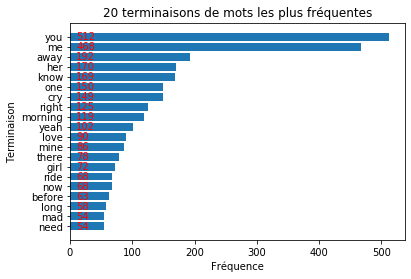

In [56]:
dic_agg={}
dic_agg['last_syl']='count'
dic_agg['last_word']=[lambda x:x.value_counts().index[0]]
term=songs_line.groupby(['last_syl'], as_index=False).agg(dic_agg)
term.columns = [' '.join(col).strip() for col in term.columns.values]
term=term.sort_values(by=['last_syl count'], ascending=False)



noms = {'last_word <lambda>': 'Mot_fréquent',
        'last_syl count': 'Fréquence'}
  
term.rename(columns=noms,
          inplace=True)

top20=term[0:20]

other={'Fréquence':term['Fréquence'][20:].sum(), 'Mot_fréquent':'other',}
top20=top20.sort_values(by=['Fréquence'], ascending=True)



plt.barh(top20[top20.columns[1]], top20[top20.columns[0]])
plt.ylabel('Terminaison') 
plt.xlabel('Fréquence')
plt.title('20 terminaisons de mots les plus fréquentes')
i=0
while i<len(top20):
    plt.text(10, i, top20.iloc[i,0] ,ha='left', color='r', va='center')
    i+=1

In [57]:
r1=[]
r2=[]
r3=[]
tr=[]
i=0


while i<len(songs_line):      
    
    a=songs_line.iloc[i,6]
    if i>2 and i<len(songs_line)-3:
        if (a==songs_line.iloc[i-1,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-1,0]) or (a==songs_line.iloc[i+1,6] and songs_line.iloc[i,0]==songs_line.iloc[i+1,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-1,2])  or (songs_line.iloc[i,2]==songs_line.iloc[i+1,2]):
                r1.append(0.5)
            else:
                r1.append(1)
        else:
            r1.append(0)           
        if (a==songs_line.iloc[i-2,6] and songs_line.iloc[i,0]==songs_line.iloc[i-2,0]) or (a==songs_line.iloc[i+2,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+2,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-2,2]) or (songs_line.iloc[i,2]==songs_line.iloc[i+2,2]):
                r2.append(0.5)
            else:
                r2.append(1)
        else:
            r2.append(0)        
        if (a==songs_line.iloc[i-3,6] and songs_line.iloc[i,0]==songs_line.iloc[i-3,0]) or (a==songs_line.iloc[i+3,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+3,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-3,2]) or (songs_line.iloc[i,2]==songs_line.iloc[i+3,2]):
                r3.append(0.5)
            else:
                r3.append(1)
        else:
            r3.append(0) 
                
    elif i==0:

        if (a==songs_line.iloc[i+1,6] and songs_line.iloc[i,0]==songs_line.iloc[i+1,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i+1,2]):
                r1.append(0.5)
            else:
                r1.append(1)
        else:
            r1.append(0)           
        if (a==songs_line.iloc[i+2,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+2,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i+2,2]):
                r2.append(0.5)
            else:
                r2.append(1)
        else:
            r2.append(0)        
        if (a==songs_line.iloc[i+3,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+3,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i+3,2]) :
                r3.append(0.5)
            else:
                r3.append(1)
        else:
            r3.append(0)
                
    elif i==1:

        if (a==songs_line.iloc[i-1,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-1,0]) or (a==songs_line.iloc[i+1,6] and songs_line.iloc[i,0]==songs_line.iloc[i+1,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-1,2])  or (songs_line.iloc[i,2]==songs_line.iloc[i+1,2]):
                r1.append(0.5)
            else:
                r1.append(1)
        else:
            r1.append(0)           
        if (a==songs_line.iloc[i+2,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+2,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i+2,2]):
                r2.append(0.5)
            else:
                r2.append(1)
        else:
            r2.append(0)        
        if (a==songs_line.iloc[i+3,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+3,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i+3,2]):
                r3.append(0.5)
            else:
                r3.append(1)
        else:
            r3.append(0) 

                
    if i==2:

        if (a==songs_line.iloc[i-1,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-1,0]) or (a==songs_line.iloc[i+1,6] and songs_line.iloc[i,0]==songs_line.iloc[i+1,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-1,2])  or (songs_line.iloc[i,2]==songs_line.iloc[i+1,2]):
                r1.append(0.5)
            else:
                r1.append(1)
        else:
            r1.append(0)           
        if (a==songs_line.iloc[i-2,6] and songs_line.iloc[i,0]==songs_line.iloc[i-2,0]) or (a==songs_line.iloc[i+2,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+2,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-2,2]) or (songs_line.iloc[i,2]==songs_line.iloc[i+2,2]):
                r2.append(0.5)
            else:
                r2.append(1)
        else:
            r2.append(0)        
        if (a==songs_line.iloc[i+3,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+3,0]):
            if  (songs_line.iloc[i,2]==songs_line.iloc[i+3,2]):
                r3.append(0.5)
            else:
                r3.append(1)
        else:
            r3.append(0) 
 
                
                
    elif i==len(songs_line)-1:

        if (a==songs_line.iloc[i-1,6] and songs_line.iloc[i,0]==songs_line.iloc[i-1,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-1,2]):
                r1.append(0.5)
            else:
                r1.append(1)
        else:
            r1.append(0)           
        if (a==songs_line.iloc[i-2,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-2,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-2,2]):
                r2.append(0.5)
            else:
                r2.append(1)
        else:
            r2.append(0)        
        if (a==songs_line.iloc[i-3,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-3,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-3,2]) :
                r3.append(0.5)
            else:
                r3.append(1)
        else:
            r3.append(0)
                
    elif i==len(songs_line)-2:

        if (a==songs_line.iloc[i-1,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-1,0]) or (a==songs_line.iloc[i+1,6] and songs_line.iloc[i,0]==songs_line.iloc[i+1,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-1,2])  or (songs_line.iloc[i,2]==songs_line.iloc[i+1,2]):
                r1.append(0.5)
            else:
                r1.append(1)
        else:
            r1.append(0)           
        if (a==songs_line.iloc[i-2,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-2,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-2,2]):
                r2.append(0.5)
            else:
                r2.append(1)
        else:
            r2.append(0)        
        if (a==songs_line.iloc[i-3,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-3,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-3,2]):
                r3.append(0.5)
            else:
                r3.append(1)
        else:
            r3.append(0) 

                
    elif i==len(songs_line)-3:

        if (a==songs_line.iloc[i-1,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-1,0]) or (a==songs_line.iloc[i+1,6] and songs_line.iloc[i,0]==songs_line.iloc[i+1,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-1,2]) or (songs_line.iloc[i,2]==songs_line.iloc[i+1,2]):
                r1.append(0.5)
            else:
                r1.append(1)
        else:
            r1.append(0)           
        if (a==songs_line.iloc[i-2,6] and songs_line.iloc[i,0]==songs_line.iloc[i-2,0]) or (a==songs_line.iloc[i+2,6]  and songs_line.iloc[i,0]==songs_line.iloc[i+2,0]):
            if (songs_line.iloc[i,2]==songs_line.iloc[i-2,2]) or (songs_line.iloc[i,2]==songs_line.iloc[i+2,2]):
                r2.append(0.5)
            else:
                r2.append(1)
        else:
            r2.append(0)        
        if (a==songs_line.iloc[i-3,6]  and songs_line.iloc[i,0]==songs_line.iloc[i-3,0]):
            if  (songs_line.iloc[i,2]==songs_line.iloc[i-3,2]):
                r3.append(0.5)
            else:
                r3.append(1)
        else:
            r3.append(0) 
             
    l=[r1[-1],r2[-1],r3[-1]]
    tr.append(max(l))
    i+=1
        
    
songs_line['Rime1']=r1
songs_line['Rime2']=r2
songs_line['Rime3']=r3
songs_line['Rime_max']=tr


songs_line

    


,title,line,last_word,nb_syllables,last_word_phonetics,line_number,last_syl,Rime1,Rime2,Rime3,Rime_max
0,I Saw Her Standing There,"(One, two, three, four)",four,4,fɔr,1,ɔr,0.0,0.0,0.0,0.0
1,I Saw Her Standing There,"Well, she was just seventeen",seventeen,7,ˈsɛvənˈtin,2,in,1.0,0.0,0.0,1.0
2,I Saw Her Standing There,You know what I mean,mean,5,min,3,in,1.0,0.0,0.0,1.0
3,I Saw Her Standing There,And the way she looked was way beyond compare,compare,11,kəmˈpɛr,4,ɛr,0.0,1.0,0.0,1.0
4,I Saw Her Standing There,So how could I dance with another,another,9,əˈnəðər,5,ər,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5534,I Call Your Name,I never weep at night,night,6,naɪt,22,aɪt,0.0,0.5,0.0,0.5
5535,I Call Your Name,I call your name,name,4,neɪm,23,eɪm,0.5,0.5,0.5,0.5
5536,I Call Your Name,I call your name,name,4,neɪm,24,eɪm,0.5,0.5,1.0,1.0
5537,I Call Your Name,I call your name,name,4,neɪm,25,eɪm,0.5,0.5,0.0,0.5


In [58]:
dic_agg={}

dic_agg['nb_syllables']=['sum', 'var'] # nombre d'essais
dic_agg['line_number']='max' # nombre d'essais
dic_agg['Rime_max']='mean' # nombre d'essais
dic_agg['last_word']=[lambda x:x.value_counts().index[0],lambda x:x.value_counts()[0], lambda x: x.nunique() ]
dic_agg['last_syl']=[lambda x:x.value_counts().index[0], lambda x:x.value_counts()[0], lambda x: x.nunique()]
gb=songs_line.groupby(['title'], as_index=False).agg(dic_agg)

gb.columns = [' '.join(col).strip() for col in gb.columns.values]


noms = {'last_word <lambda_0>': 'Dmot_fréquent',
        'last_word <lambda_1>': 'Dmot_nb',
        'last_word <lambda_2>': 'Dmot_distinct',
        'last_syl <lambda_0>': 'Dsyl_fréquent',
        'last_syl <lambda_1>': 'Dsyl_nb',
        'last_syl <lambda_2>': 'Dsyl_distinct'}
  
# call rename () method
gb.rename(columns=noms,
          inplace=True)


gb

,title,nb_syllables sum,nb_syllables var,line_number max,Rime_max mean,Dmot_fréquent,Dmot_nb,Dmot_distinct,Dsyl_fréquent,Dsyl_nb,Dsyl_distinct
0,A Day In The Life,250,6.436782,30,0.433333,on,2,28,ɔl,3,21
1,A Hard Day's Night,274,15.210145,24,0.312500,alright,4,11,aɪt,6,9
2,A Taste Of Honey,114,4.916667,16,0.125000,honey,4,9,i,4,8
3,Across The Universe,295,12.605042,35,0.314286,world,12,13,ərld,12,12
4,All I've Got To Do,184,8.273684,20,0.250000,yeah,5,10,æ,5,8
...,...,...,...,...,...,...,...,...,...,...,...
177,You Never Give Me Your Money,317,6.143965,43,0.686047,seven,8,22,ən,17,15
178,You Won't See Me,255,2.910677,44,0.568182,me,8,23,i,8,15
179,You're Going To Lose That Girl,197,2.312808,29,0.396552,girl,11,11,ərl,11,10
180,You've Got To Hide Your Love Away,128,2.252632,20,0.600000,away,4,15,eɪ,8,10


In [1]:
def Barplot(
    df,
    metric: str,
    by: str,
    stat: str='mean',
    text_position: float=0.05,
    vertical: bool=True,
    color: list=['blue', 'red', 'green', 'orange', 'purple', 'pink'],
    title: str='default',
    alpha=0.95
): 
    
    """
    Function to return barplot with title, datalabel and errorbar from pandas df
    
    Arguments:
      df (pd.DataFrame) the dataframe we want to use (str)
      metric = the column in df that contains the metrics we want to analyse (str)
      by = the column in df that contains the groups we want to compare (str)
      text_position (float=0.05) the location of the text for datalabel. The y when (float)
      vertical = indicates if we want an horizontal or vertical plot (bool)
      color = the color of the bars (str or list of str)
      title = title of the plot, default is: Mean of 'y' for each 'by'
      
    """
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    import plotly.express as px
    from plotly import offline



    
    dic_agg={}
    dic_agg[metric]=['mean', 'sem', 'count'] # nombre d'essais
    gb=df.groupby([by], as_index=False).agg(dic_agg)
    gb.columns = [' '.join(col).strip() for col in gb.columns.values]


    #column_names = {'last_word <lambda_0>': 'Dmot_fréquent',
     #   'last_word <lambda_1>': 'Dmot_nb',
      #  'last_word <lambda_2>': 'Dmot_distinct',
       # 'last_syl <lambda_0>': 'Dsyl_fréquent',
        #'last_syl <lambda_1>': 'Dsyl_nb',
        #'last_syl <lambda_2>': 'Dsyl_distinct'}
    
    
    lci=[]
    uci=[]
    z_score=norm.ppf(1-(1-alpha)/2) 
    for i in range(len(gb)):
        lci.append(gb.iloc[i,1]-gb.iloc[i,2]*z_score)
        uci.append(gb.iloc[i,1]+gb.iloc[i,2]*z_score)
    gb['lower confidence interval']=lci
    gb['upper confidence interval']=uci

           
    
    if vertical==True:   
        plt.bar(gb[gb.columns[0]], gb[gb.columns[1]], color=color)##Bar plot
        plt.errorbar( gb[gb.columns[0]], gb[gb.columns[1]], yerr=gb[gb.columns[3]], fmt='o', color='Black', elinewidth=3,capthick=3,errorevery=1, alpha=1, ms=4, capsize = 5)
        plt.ylabel(metric) ##Label on Y axis
        
        for i in range(len(gb)):
            plt.text(i, text_position, round(gb.iloc[i,1],3) , ha='center', color='white', va='bottom', fontweight='bold')
            
    elif vertical==False: 
      #  plt.barh(gb[gb.columns[0]], gb[gb.columns[1]], color=color)##Bar plot
       # plt.errorbar( gb[gb.columns[1]],  gb[gb.columns[0]], xerr=gb[gb.columns[3]], fmt='o', color='Black', elinewidth=3,capthick=3,errorevery=1, alpha=1, ms=4, capsize = 5)
    #    plt.xlabel(metric) ##Label on Y axis
        fig = px.bar(gb, x="Results_continuous mean", y="VariantName", orientation='h',
             hover_data=["Results_continuous count", "lower confidence interval", "upper confidence interval"],
             height=400,
             title='Restaurant bills')
        
        
        #for i in range(len(gb)):
         #   plt.text(text_position, i, round(gb.iloc[i,1],3) ,ha='left', color='white', va='center', fontweight='bold')
            
    #if title =='default':
     #   plt.title('Mean of '+ metric + ' for each ' + by)
    #else: 
     #   plt.title(title) 
    def PlotFigure(plot_def, **kwargs):
        kwargs['output_type'] = 'div'
        plot_str = offline.plot(plot_def, **kwargs)
        print('%%angular <div>%s</div>' % plot_str)

    PlotFigure(fig)
        
    return gb
        
#Barplot(df=test_df, metric='Results_continuous', by='VariantName', vertical=False)


In [106]:
info

,title,album,year
0,12-Bar Original,Anthology 2,1965
1,Across the Universe,Let It Be,1968
2,Act Naturally,Help!,1965
3,Ain't She Sweet,Anthology 1,1961
4,All I've Got to Do,With the Beatles,1963
...,...,...,...
300,Young Blood,Live at the BBC,1963
301,Your Mother Should Know,Magical Mystery Tour,1967
302,You're Going to Lose That Girl,Help!,1965
303,You've Got to Hide Your Love Away,Help!,1965


In [2]:
#Create a test dataframe for my analysis (don't have to use google query and prevent protobuf error, also easier to test data)

from random import randrange
from datetime import timedelta
from pandas import DataFrame

randomlist=[]

#ID

player_id = list(range(1, 301))


#VariantName    
variant=['Control', 'Treatment']
variant_list=[]
for i in range(0,300):
    n = random.randint(0,2)
    variant_list.append(variant[n])

#d_timestamp
def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

from datetime import datetime

d1 = datetime.strptime('1/1/2020 1:30 PM', '%m/%d/%Y %I:%M %p')
d2 = datetime.strptime('1/1/2021 4:50 AM', '%m/%d/%Y %I:%M %p')


list_date=[]
for i in range(0,300):
    list_date.append(random_date(d1, d2))


    
test_df=DataFrame({'ID': player_id, 'VariantName': variant_list, 'd__timestamp': list_date})    


#Results_binary
column_names=variant
res=[]
for i in range(len(test_df)):
    a=random.random()
    if column_names.index(test_df['VariantName'][i])%5==0:
        if a<0.30:
            res.append(1)
        else:
            res.append(0)
    elif column_names.index(test_df['VariantName'][i])%5==1:
        if a<0.35:
            res.append(1)
        else:
            res.append(0)
    elif column_names.index(test_df['VariantName'][i])%5==2:
        if a<0.50:
            res.append(1)
        else:
            res.append(0)
    elif column_names.index(test_df['VariantName'][i])%5==3:
        if a<0.38:
            res.append(1)
        else:
            res.append(0)
    elif column_names.index(test_df['VariantName'][i])%5==4:
        if a<0.40:
            res.append(1)
        else:
            res.append(0)
            
            
#Results_continuous
column_names=variant
continuous=[]
for i in range(len(test_df)):
    a=random.random()
    if column_names.index(test_df['VariantName'][i])%5==0:
        continuous.append(a*3)
    elif column_names.index(test_df['VariantName'][i])%5==1:
        continuous.append(a*3.5)

    elif column_names.index(test_df['VariantName'][i])%5==2:
        continuous.append(a*2.4)

    elif column_names.index(test_df['VariantName'][i])%5==3:
        continuous.append(a*3.1)

    elif column_names.index(test_df['VariantName'][i])%5==4:
        continuous.append(a*0)


test_df['Results_binary']=res
test_df['Results_continuous']=continuous

test_df 

##add new distributions

NameError: name 'random' is not defined

In [107]:
lyrics.columns

Index(['title', 'songs_Song_Lyrics', 'words', 'distinct_words',
       'ratio_distinct'],
      dtype='object')

In [59]:
lyrics=lyrics.rename(columns={'songs_title': 'title'})
writer=writer.rename(columns={'Song': 'title'})
charts=charts.rename(columns={'song_title': 'title'})


print(gb.columns[0], lyrics.columns[0], writer.columns[0], charts.columns[0], gb.columns[0])
#lyrics



i=0
while i<len(gb):
    gb.iloc[i,0]=re.sub('[!@#*$.)(]', '', gb.iloc[i,0].lower())
    i+=1

i=0
while i<len(lyrics):
    lyrics.iloc[i,0]=re.sub('[!@#*$.)(]', '', lyrics.iloc[i,0].lower())
    i+=1
i=0
while i<len(writer):
    writer.iloc[i,0]=re.sub('[!@#*$.)(]', '', writer.iloc[i,0].lower())
    i+=1
i=0
while i<len(charts):
    charts.iloc[i,0]=re.sub('[!@#*$.)(]', '', charts.iloc[i,0].lower())
    i+=1
i=0
while i<len(info):
    info.iloc[i,0]=re.sub('[!@#*$.)(]', '', info.iloc[i,0].lower())
    i+=1

i=0
while i<len(spotify):
    spotify.iloc[i,2]=re.sub('[!@#*$.)(]', '', spotify.iloc[i,2].lower())
    i+=1

i=0
print(len(gb), len(lyrics), len(writer), len(charts), len(info), len(chords))





a=info.merge(writer, how='inner', on='title')
b=a.merge(charts, how='left', on='title')
c=b.merge(spotify, how='inner', on='title')
d=c.merge(lyrics, how='inner', on='title')
fulldb=d.merge(gb, how='inner', on='title')
chordsinfo=chords.merge(c, how='inner', on='title')


print( len(a), len(b), len(c), len(d), len(fulldb), len(chordsinfo))
d

i=0
while i<len(fulldb['Week_On chart']):
    if fulldb['Week_On chart'].isna()[i]==True:
        fulldb['Week_On chart'][i]=0
    i+=1
fulldb=fulldb.sort_values(by=['order'])
fulldb

a=fulldb['order']
b=set(a)
len(b), len(a)

chordsinfo

title title title title title
182 184 210 68 305 133
200 201 206 181 181 108


C:\Users\benoi\anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,tone,mode,chords,chords_list,album,year,Main composer,Singer,Peak_Position,Week_On chart,Week_no1,order,Popularity,duration
0,she loves you,G,maj,"I,vi,iii,V,I,vi,iii,V,I,vi,iv,V","[I, vi, iii, V, I, vi, iii, V, I, vi, iv, V]",A Collection of Beatles Oldies,1963,Lennon / McCartney,Lennon / McCartney,1.0,33.0,6.0,16,49,141
1,taxman,D,mix,"I7,VII,IV,I7,VII7,I7,VII","[I7, VII, IV, I7, VII7, I7, VII]",Revolver,1966,Harrison,Harrison,NaN,NaN,NaN,98,62,158
2,mean mr mustard,E,mix,"I7,I43,I7,I43,I7,I43,I7,V7,V43,V7,bVI7,VI7,VII...","[I7, I43, I7, I43, I7, I43, I7, V7, V43, V7, b...",Abbey Road,1969,Lennon,Lennon,NaN,NaN,NaN,195,56,66
3,flying,C,maj,"I,V7,IV,I,V7,IV,I,V","[I, V7, IV, I, V7, IV, I, V]",Magical Mystery Tour,1967,Harrison / Lennon / McCartney / Starkey,Harrison / Lennon / McCartney / Starr,NaN,NaN,NaN,133,52,135
4,savoy truffle,E,maj,"I,II,bIII,III,IV,bIII,V,i,i42,vi7,i64,IV,IV6,I...","[I, II, bIII, III, IV, bIII, V, i, i42, vi7, i...",The Beatles,1968,Harrison,Harrison,NaN,NaN,NaN,170,49,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,for no one,C#,min,"I,iii64,vi,I64,IV,bVII,I,i,V7,i,V7,i,Vsus4,V","[I, iii64, vi, I64, IV, bVII, I, i, V7, i, V7,...",Revolver,1966,McCartney,McCartney,NaN,NaN,NaN,107,63,119
104,lady madonna,A,maj,"I,IV,I,IV,I,IV,bVI,bVII,I,ii,ii42,vii7,ii64,V,...","[I, IV, I, IV, I, IV, bVI, bVII, I, ii, ii42, ...",1967-1970,1968,McCartney,McCartney,1.0,8.0,2.0,142,38,137
105,tomorrow never knows,C,mix,I,[I],Revolver,1966,Lennon,Lennon,NaN,NaN,NaN,111,58,179
106,sexy sadie,G,maj,"I,V,iii,IV,V,I,VII,IV,V,I,VII,bVII,V","[I, V, iii, IV, V, I, VII, IV, V, I, VII, bVII...",The Beatles,1968,Lennon,Lennon,NaN,NaN,NaN,165,53,195


In [60]:
chordsinfo['year'].value_counts(), fulldb['year'].value_counts() 



(1968    25
 1966    19
 1969    19
 1967    17
 1965    13
 1963     8
 1964     5
 1962     2
 Name: year, dtype: int64,
 1968    30
 1967    27
 1969    27
 1964    26
 1965    24
 1963    23
 1966    19
 1962     4
 1970     1
 Name: year, dtype: int64)

In [61]:
mixo= ['I','ii','iii','IV','v','vi','VII']
majo=['I','ii','iii','IV','V','vi','vii']
dori=['i','ii','bIII','IV','v','vi','VII']
lydi=['I','II','iii','iv','V','vi','vii']
mino=['i','ii','III','iv','v','VI','VII']


chordsinfo=chordsinfo.sort_values(by=['order'])
#chordsinfo.drop(chordsinfo.index[[0]], inplace=True)



i=0
bc=[]
nc=[]
dc=[]
rc=[]
rdc=[]
cc=[]
idx=[]

while i<len(chordsinfo):
    a=chordsinfo.iloc[i,4]
    d=set(a)
    b=chordsinfo.iloc[i,2]
    j=0
    bcc=0
    if b=='mix':
        c=mixo
    elif b=='maj' or b=='lyd':
        c=majo
    elif b=='min' or b=='dor' :
        c=mino
    while j<len(a):
        if a[j] in c:
            bcc+=0
        else:
            bcc+=1
        j+=1
    bc.append(bcc)
    nc.append(len(a))
    rc.append(bcc/len(a))
    dc.append(len(d))
    rdc.append(len(d)/len(a))
    idx.append(i+1)
    cc.append((bcc/len(a)+len(d)/len(a))/2)
    i+=1

  
i=0
l=[]
mn=[]
mj=[]
mx=[]
n=0
j=0
x=0
while i<len(chordsinfo):
    a=chordsinfo.iloc[i,3].split(',')
    l.append(a)
    if chordsinfo.iloc[i,2]=='mix':
        x+=1
    if chordsinfo.iloc[i,2]=='min':
        n+=1
    if chordsinfo.iloc[i,2]=='maj':
        j+=1
    mn.append(n/(i+1))
    mj.append(j/(i+1))
    mx.append(x/(i+1)) 
    i+=1
            
    
chordsinfo['borrowed_chords']=bc
chordsinfo['nb_chords']=nc
chordsinfo['ratio_bchords']=rc
chordsinfo['distinct_chords']=dc
chordsinfo['ratio_nchords']=rdc
chordsinfo['chorder']=idx
chordsinfo['ratio_major']=mj
chordsinfo['ratio_minor']=mn
chordsinfo['ratio_mixo']=mx
chordsinfo['complexity']=cc

chordsinfo
#chordexport=chords.merge(fulldb, how='outer', on='title')

#chordexport=chordexport.sort_values(by=['order'])
#chordexport.drop(chordexport.index[[0]], inplace=True)

#chordexport.to_excel
#chordexport.to_excel('C:/Users/benoi/Documents/HEC/_Hiver 2021/Données textuelles/chordspotify.xlsx')

chordsinfo['order']

93      0
90      2
55      7
57      8
85     13
     ... 
47    203
66    205
30    208
76    213
45    214
Name: order, Length: 108, dtype: int64

In [62]:
#nombre de chansons n'ayant pas figuré dans le top 100)

fulldb['Week_On chart'].value_counts()[0]/len(fulldb)

0.856353591160221

In [63]:
import matplotlib.pyplot as plt
from scipy import stats
from statistics import mean

x1=1
y1=1

def scatter_reg(x1,y1, df=fulldb, title='a', xlabel=x1, ylabel=y1, color='coral', stat='mean' ):
    x =  df[x1].tolist()
    y =  df[y1].tolist()

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    def myfunc(x):
        return slope * x + intercept

    mymodel = list(map(myfunc, x))

    plt.scatter(x, y, c=color)
    plt.plot(x, mymodel)
    if title =='a':
        plt.title(y1+' en fonction de ' +x1)
    else: 
        plt.title(title)
    plt.xlabel(x1)
    plt.ylabel(y1)
    plt.show()
    print ('   Pente:',int(slope*10000)/10000, ', p-value=',int(p*10000)/10000, ', moyenne= ',int(mean(y)*100)/100)
    
   
    
    
    
    
    


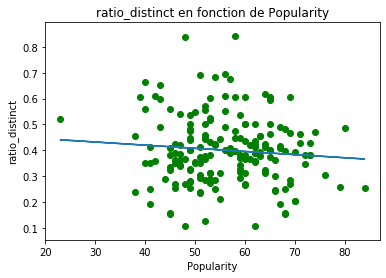

   Pente: -0.0012 , p-value= 0.2235 , moyenne=  0.4


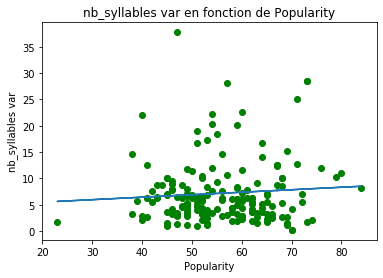

   Pente: 0.0472 , p-value= 0.2957 , moyenne=  7.2


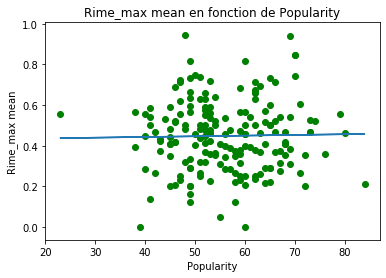

   Pente: 0.0003 , p-value= 0.8028 , moyenne=  0.44


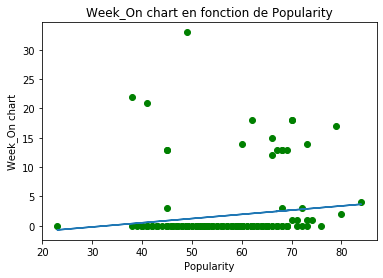

   Pente: 0.0718 , p-value= 0.0626 , moyenne=  1.65


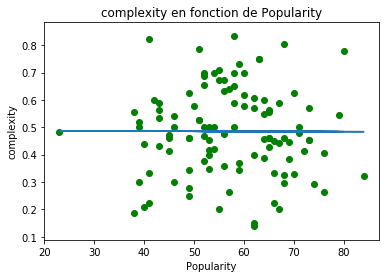

   Pente: 0.0 , p-value= 0.9733 , moyenne=  0.48


In [65]:

#scatter_reg('order', "ratio_distinct", title= 'Indice de mots distincts des chansons des Beatles, classées chronologiquement')
#scatter_reg('order', "Rime_max mean", title='Indice de rimes des chansons des Beatles, classées chronologiquement')
#scatter_reg('order', 'duration')
scatter_reg('Popularity', 'ratio_distinct', color='green')
scatter_reg('Popularity', 'nb_syllables var',color='green')
scatter_reg('Popularity', 'Rime_max mean',color='green')
scatter_reg('Popularity', 'Week_On chart',color='green')
scatter_reg('Popularity', 'complexity', df=chordsinfo,color='green')

#scatter_reg('year', 'Popularity')
#scatter_reg('order', 'nb_syllables var')
#scatter_reg('order', 'words')
#scatter_reg('order', 'line_number max')






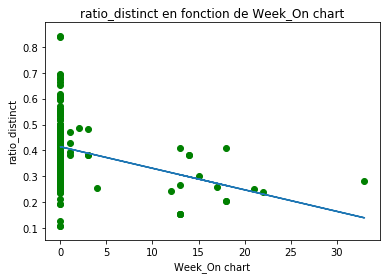

   Pente: -0.0083 , p-value= 0.0 , moyenne=  0.4


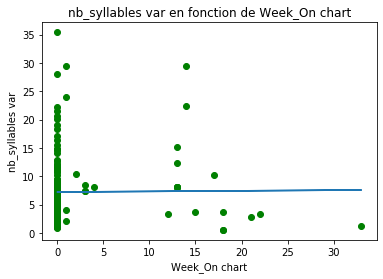

   Pente: 0.0106 , p-value= 0.9014 , moyenne=  7.23


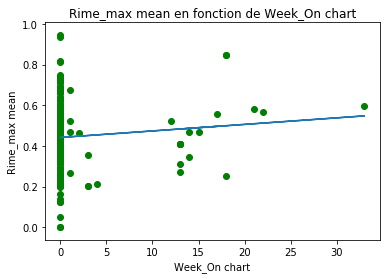

   Pente: 0.0032 , p-value= 0.2112 , moyenne=  0.44


In [122]:
scatter_reg('Week_On chart', 'ratio_distinct', color='green')
scatter_reg('Week_On chart', 'nb_syllables var',color='green')
scatter_reg('Week_On chart', 'Rime_max mean',color='green')

In [117]:
def singer(y, db=fulldb, stat='mean', ht=0.1):
    
    
    dic_agg={}
    dic_agg[y]=[stat, 'sem'] # nombre d'essais
    dic_agg['title']='count'
    gb=db.groupby(['Main composer'], as_index=False).agg(dic_agg)
    gb=gb.sort_values(by=[gb.columns[3]], ascending=False)
    #gb=gb[['Main composer', x]]
    i=0
    ci=[]
    while i<len(gb):
        if gb.iloc[i,0] in ['Lennon','McCartney','Harrison']:
            ci.append(gb.iloc[i,2]*1.96)
            i+=1
        else:
            gb = gb.drop(gb.index[i])
        
    gb['confidence interval']=ci
           
    #sns.barplot(x = gb.columns[0], y = gb.columns[1], err=gb.columns[3] , data = gb)
    #plt.show()
    plt.errorbar( gb[gb.columns[0]], gb[gb.columns[1]], yerr=gb[gb.columns[4]], fmt='o', color='Black', elinewidth=3,capthick=3,errorevery=1, alpha=1, ms=4, capsize = 5)
    plt.bar(gb[gb.columns[0]], gb[gb.columns[1]], color=['blue', 'red', 'green'])##Bar plot
    plt.ylabel(y) ##Label on Y axis
    i=0
    while i<len(gb):
        plt.text(i, ht,int(gb.iloc[i,1]*1000)/1000 ,ha='center', color='white', va='center', fontweight='bold')
        i+=1

    

    


    
    


In [118]:
def slide(y, ht=0.1):
    scatter_reg('order', y, title=y + ' pour chaque chanson, classées chronologiquement')
    scatter_reg('Popularity', y, title= y + ' selon leur popularité sur Spotify', color='green')
    singer(y, ht=ht)
    
    
def slidechords(y):
    scatter_reg('order', y, title=y + ' pour chaque chanson, classées chronologiquement', df=chordsinfo,)
    scatter_reg('Popularity', y, title= y + ' selon leur popularité sur Spotify', color='green',  df=chordsinfo)
    singer(y,  db=chordsinfo)
  


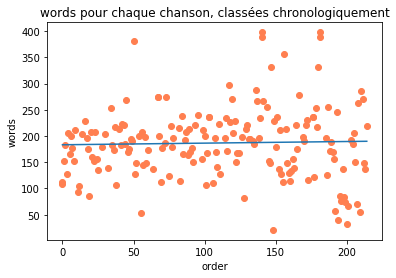

   Pente: 0.031 , p-value= 0.6975 , moyenne=  186.8


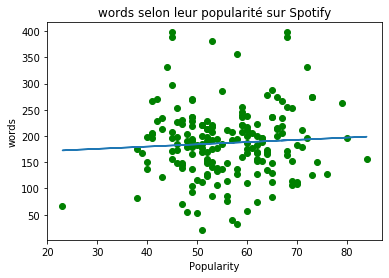

   Pente: 0.429 , p-value= 0.4092 , moyenne=  186.8


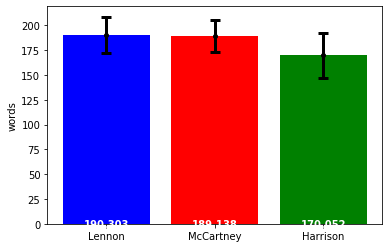

In [119]:
slide('words') 

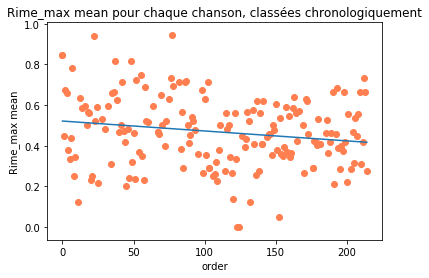

   Pente: -0.0004 , p-value= 0.0153 , moyenne=  0.46


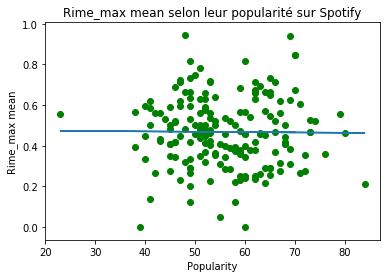

   Pente: -0.0001 , p-value= 0.8986 , moyenne=  0.46


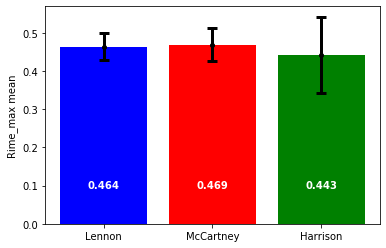

In [434]:
slide('Rime_max mean') 

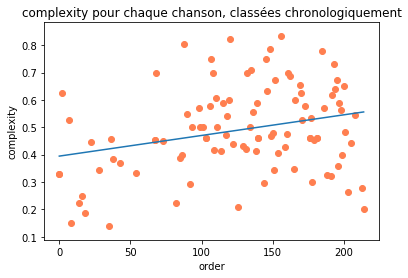

   Pente: 0.0007 , p-value= 0.0051 , moyenne=  0.49


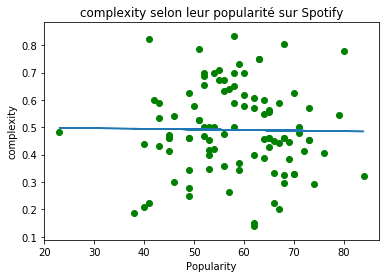

   Pente: -0.0002 , p-value= 0.8836 , moyenne=  0.49


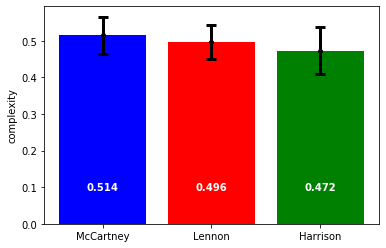

In [436]:
slidechords('complexity')

In [65]:
slide('nb_syllables var', ht=2)

NameError: name 'slide' is not defined

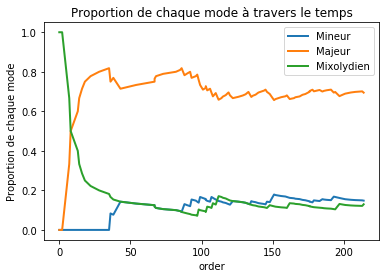

In [118]:

o=chordsinfo['order'].to_list()

#o = [i for i in range(len(chordsinfo))]


plt.plot(o, mn,   label = 'Mineur',  linewidth=2)
plt.plot(o, mj,   label = 'Majeur',  linewidth=2)
plt.plot(o, mx, label = 'Mixolydien', linewidth=2)

plt.xlabel('order')
plt.ylabel('Proportion de chaque mode')
plt.legend(loc='upper right')
plt.title('Proportion de chaque mode à travers le temps')
plt.show()

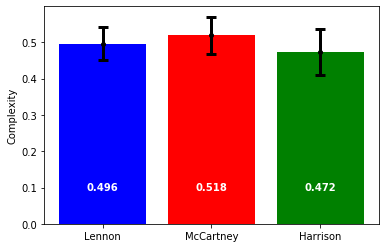

In [471]:
 
    dic_agg={}
    dic_agg['complexity']=['mean', 'sem'] # nombre d'essais
    dic_agg['title']='count'
    gb=chordsinfo.groupby(['Main composer'], as_index=False).agg(dic_agg)
    #gb=gb[['Main composer', x]]
    i=0
    ci=[]
    while i<len(gb):
        if gb.iloc[i,0] in ['Lennon','McCartney','Harrison']:
            ci.append(gb.iloc[i,2]*1.96)
            i+=1
        else:
            gb = gb.drop(gb.index[i])
        
    gb['confidence interval']=ci
    
    
    gb['order']=[3,1,2]
    gb=gb.sort_values(by=['order'])
    gb


    plt.errorbar( gb[gb.columns[0]], gb[gb.columns[1]], yerr=gb[gb.columns[4]], fmt='o', color='Black', elinewidth=3,capthick=3,errorevery=1, alpha=1, ms=4, capsize = 5)
    plt.bar(gb[gb.columns[0]], gb[gb.columns[1]], color=['blue', 'red', 'green'])##Bar plot
    plt.ylabel('Complexity') ##Label on Y axis
    i=0
    while i<len(gb):
        plt.text(i, 0.1,int(gb.iloc[i,1]*1000)/1000 ,ha='center', color='white', va='center', fontweight='bold')
        i+=1

    